# Trabajo Práctico 1 - Laboratorio de Datos - 1C 2025

**Integrantes del grupo:**

In [1]:
# Descomentar y correr esto una sola vez
#!pip install formulaic

In [4]:
# Si requieren mas librerias, pueden importarlas aca
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import seaborn.objects as so
import json
import plotly.express as px
from formulaic import Formula
from sklearn import linear_model  
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error  

# Si no existe root_mean_squared_error, quitarlo o actualizar scikit-learn con el comando
#!pip install scikit-learn --upgrade

ImportError: cannot import name 'root_mean_squared_error' from 'sklearn.metrics' (C:\Users\Micaela\anaconda3\Lib\site-packages\sklearn\metrics\__init__.py)

In [5]:
df_educacion = pd.read_csv('indicadores-proceso-trayectoria-sobreedad-2012_2022.csv')
df_educacion

,anio,municipio_id,municipio_nombre,promocion_efectiva_primaria,promocion_efectiva_secundaria,repitencia_primaria,repitencia_secundaria,reinscripcion_primaria,reinscripcion_secundaria,abandono_interanual_primaria,...,alumnos_no_promovidos_primaria,alumnos_no_promovidos_secundaria,salidos_sin_pase_primaria,salidos_sin_pase_secundaria,salidos_con_pase_primaria,salidos_con_pase_secundaria,sobreedad_primaria,sobreedad_secundaria,sobreedad_avanzada_primaria,sobreedad_avanzada_secundaria
0,2012,6007,Adolfo Alsina,100.26,84.14,1.25,9.06,0.07,1.79,-1.57,...,1.45,18.54,0.00,2.71,5.40,2.90,12.61,26.77,4.01,12.28
1,2013,6007,Adolfo Alsina,97.35,86.84,1.68,5.31,0.13,0.12,0.84,...,0.70,9.48,0.30,2.77,5.02,5.72,10.27,26.27,3.42,11.51
2,2014,6007,Adolfo Alsina,97.36,80.79,2.23,2.52,0.07,0.43,0.34,...,0.69,9.13,0.13,2.11,4.84,4.31,8.46,25.06,2.51,9.17
3,2015,6007,Adolfo Alsina,96.00,91.55,2.41,5.24,0.21,0.85,1.38,...,1.47,8.62,0.33,2.49,4.96,4.64,7.16,30.85,1.86,10.51
4,2016,6007,Adolfo Alsina,97.67,95.56,2.61,7.27,0.07,1.29,-0.35,...,1.58,6.95,0.14,2.79,4.72,3.57,6.81,26.13,1.69,8.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,2018,6882,Zarate,95.42,87.30,3.83,8.27,0.06,1.80,0.69,...,2.28,12.39,0.09,2.37,2.42,3.58,7.91,28.77,2.06,11.73
1481,2019,6882,Zarate,95.62,86.58,3.55,9.53,0.01,0.83,0.82,...,1.97,13.63,0.08,0.51,3.30,3.67,8.10,27.71,1.89,10.12
1482,2020,6882,Zarate,99.51,99.06,0.04,0.00,0.00,0.09,0.45,...,0.00,0.58,0.03,0.05,3.12,3.62,6.81,28.88,1.65,11.53
1483,2021,6882,Zarate,96.77,90.87,2.79,6.60,0.17,0.64,0.28,...,0.21,8.23,0.03,0.25,1.28,0.66,4.50,27.81,0.89,11.15


### Procesamiento de Datos

In [6]:
zona_norte = ['San Isidro', 'Vicente Lopez', 'General San Martin', 'San Fernando', 'Tigre']
zona_oeste = ['Moron', 'Tres de Febrero', 'La Matanza', 'Merlo', 'Moreno']
zona_sur = ['Almirante Brown', 'Avellaneda', 'Quilmes', 'Lanus', 'Florencio Varela', 'Berazategui', 'Lomas de Zamora', 'Esteban Echeverria']


#Implementación de la funcion determinar_zona
def determinar_zona(zona):
    #Función que determina la zona de un municipio según su nombre.
    #Recibe como parámetro el nombre del municipio y devuelve la zona correspondiente.
    #El valor de retorno será una de las 3 zonas definidas o "Interior" si no se encuentra en ninguna de las listas.
    #Cada if busca el municipio en la lista correspondiente y devuelve la zona si lo encuentra, "Interior" en caso contrario.
    if zona in zona_norte:
        return 'Norte'
    elif zona in zona_oeste:
        return 'Oeste'
    elif zona in zona_sur:
        return 'Sur'
    else:
        return 'Interior'

**1:** Queremos describir el tipo de dato de cada variable.

In [7]:
df_educacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   anio                              1485 non-null   int64  
 1   municipio_id                      1485 non-null   int64  
 2   municipio_nombre                  1485 non-null   object 
 3   promocion_efectiva_primaria       1485 non-null   float64
 4   promocion_efectiva_secundaria     1485 non-null   float64
 5   repitencia_primaria               1485 non-null   float64
 6   repitencia_secundaria             1485 non-null   float64
 7   reinscripcion_primaria            1485 non-null   float64
 8   reinscripcion_secundaria          1485 non-null   float64
 9   abandono_interanual_primaria      1485 non-null   float64
 10  abandono_interanual_secundaria    1485 non-null   float64
 11  alumnos_promovidos_primaria       1485 non-null   float64
 12  alumno

In [8]:
df_educacion.describe()

,anio,municipio_id,promocion_efectiva_primaria,promocion_efectiva_secundaria,repitencia_primaria,repitencia_secundaria,reinscripcion_primaria,reinscripcion_secundaria,abandono_interanual_primaria,abandono_interanual_secundaria,...,alumnos_no_promovidos_primaria,alumnos_no_promovidos_secundaria,salidos_sin_pase_primaria,salidos_sin_pase_secundaria,salidos_con_pase_primaria,salidos_con_pase_secundaria,sobreedad_primaria,sobreedad_secundaria,sobreedad_avanzada_primaria,sobreedad_avanzada_secundaria
count,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000,1485.00000,1485.000000,1485.000000,1485.000000,1485.000000,...,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000
mean,2017.000000,6447.851852,97.130323,86.091710,2.401246,8.56738,0.160148,1.191549,0.308168,4.149293,...,1.582707,14.301926,0.126458,1.498808,3.593003,3.969670,7.144673,28.100391,1.373899,11.110882
std,3.163343,249.738307,1.978760,6.507016,1.397346,4.24956,0.305949,1.184820,1.222472,3.120094,...,1.055560,6.656939,0.166290,1.606285,1.304485,1.735492,3.189309,7.044230,1.029497,4.014572
min,2012.000000,6007.000000,87.100000,67.960000,0.000000,0.00000,0.000000,0.000000,-8.890000,-8.090000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,3.190000,0.000000,0.000000
25%,2014.000000,6238.000000,95.850000,81.450000,1.400000,6.02000,0.000000,0.340000,-0.240000,2.190000,...,0.810000,10.140000,0.000000,0.320000,2.860000,2.860000,4.810000,23.110000,0.580000,8.170000
50%,2017.000000,6448.000000,97.210000,85.440000,2.310000,8.96000,0.080000,0.890000,0.340000,4.090000,...,1.520000,15.150000,0.070000,1.010000,3.550000,3.810000,6.900000,28.310000,1.160000,11.130000
75%,2020.000000,6658.000000,98.450000,90.140000,3.330000,11.34000,0.190000,1.700000,0.890000,6.160000,...,2.250000,19.130000,0.190000,2.190000,4.340000,4.960000,8.890000,33.050000,1.900000,13.890000
max,2022.000000,6882.000000,107.220000,103.920000,10.480000,22.88000,6.600000,12.720000,7.140000,16.260000,...,8.870000,33.700000,1.150000,12.090000,10.660000,11.890000,19.420000,51.560000,6.120000,26.720000


Podemos ver claramente los tipos de las variables de cada columna:

Las columnas correspondientes al año y al id del municipio son enteros.
La columna que contiene los nombres de los municipios contiene variables de tipo objeto al ser strings.
El resto de las columnas contiene variables de tipo float64.

**2:**

Queremos ver si hay valores faltantes en el DataFrame.

In [ ]:
df_educacion.isnull().sum()

Podemos ver que no hay valores faltantes en el DataFrame.

**3:**

Ahora queremos saber a que zona pertenece cada municipio. Para ello agregamos una columna utilizando la función implementada "determinar_zona".

In [ ]:
df_educacion["zona"] = df_educacion["municipio_nombre"].apply(determinar_zona)
df_educacion

**4:**

Vamos a analizar si la la taza de repitencia es mayor en primaria que en secundaria.

Primero agregamos una columna que indique si ocurre esta situación(1 para si, 0 para no).

In [ ]:
df_educacion["mayor_repitencia_primaria"] = df_educacion.apply(
    lambda x: 1 if x["repitencia_primaria"] > x["repitencia_secundaria"] else 0, axis=1
)
df_educacion.head(20)

Ahora vamos a mostrar en una Serie de pandas cuantas veces entre los años 2017 y 2022 ocurre esto.

In [ ]:
df_educacion[df_educacion["anio"] == 2022]["mayor_repitencia_primaria"].sum()
mayor_repitencia_primaria = pd.Series(index = range(2017, 2023), dtype = int)
for i in range(2017, 2023):
    mayor_repitencia_primaria[i] = df_educacion[df_educacion["anio"] == i]["mayor_repitencia_primaria"].sum()

mayor_repitencia_primaria

### Regresión

In [20]:
area_metropolitana = ['Almirante Brown', 'Avellaneda', 'Berazategui', 'Berisso', 'Brandsen', 'Campana', 'Cañuelas',
                      'Ensenada', 'Escobar', 'Esteban Echeverria', 'Exaltacion de la Cruz', 'Ezeiza',
                      'Florencio Varela', 'General Las Heras', 'General Rodriguez', 'General San Martin', 'Hurlingham',
                      'Ituzaingo', 'Jose C. Paz', 'La Matanza', 'La Plata', 'Lanus', 'Lujan', 'Lomas de Zamora',
                      'Malvinas Argentinas', 'Marcos Paz', 'Merlo', 'Moreno', 'Moron', 'Pilar', 'Presidente Peron',
                      'Quilmes', 'San Fernando', 'San Isidro', 'San Miguel', 'San Vicente', 'Tigre', 'Tres de Febrero',
                      'Vicente Lopez', 'Zarate']

#### 1.

Vamos a reproducir el grafico de regresion lineal.

In [ ]:
(
    so.Plot(data = df_educacion, x = 'anio', y = 'sobreedad_secundaria')
    .add(so.Dot(), so.Agg('mean')) 
    .add(so.Line(linestyle='--', color='black'), so.PolyFit(1), label = 'Ajuste lineal')
    .label(x = 'Año', y = 'Sobreedad', title = 'Sobreedad secundaria promedio PBA')
)

#### 2.

Vamos a realizar la regresion lineal para predecir la sobreedad secundaria promedio para el 2025 en la provincia de Buenos Aires
                                                                                                                       

Primero obtenemos las matrices del modelo

In [ ]:
y, X = Formula('sobreedad_secundaria ~ anio').get_model_matrix(df_educacion)

Cargamos los datos y entrenamos el modelo, lo vamos a hacer calculando el beta0 y beta1 siguiendo la sugerencia

In [ ]:
# Inicializamos el modelo
modelo = linear_model.LinearRegression(fit_intercept=False)
modelo.fit(X,y)

# Obtenemos los coeficientes
beta = modelo.coef_
beta_0 = beta[0][0]
beta_1 = beta[0][1]
print('Beta_0: ', beta_0)
print('Beta_1: ', beta_1)

In [ ]:
anio_pred = 2025 
y_pred = beta_0 + beta_1 * 2025 
print ('Sobreedad secundaria promedio PBA 2025: ', y_pred)

Como esperamos por la tendencia del grafico la sobreedad promedio tiende a bajar y para el año 2025 esta bajando respecto a años anteriores, por lo que la situacion escolar esta mejorando.

#### 3.

In [ ]:
from sklearn.linear_model import LinearRegression
promedio_2025 = 17.075587878787246
prediccion_data = []
menor_que_promedio_data = []

for partido in area_metropolitana:
    df_partido = df_educacion[df_educacion['municipio_nombre'] == partido]
    y, X = Formula('sobreedad_secundaria ~ anio').get_model_matrix(df_partido)
    modelo = linear_model.LinearRegression(fit_intercept=False)
    modelo.fit(X,y)

    # Obtenemos los coeficientes
    beta = modelo.coef_
    beta_0 = beta[0][0]
    beta_1 = beta[0][1]

    pred_2025 = beta_0 + beta_1 * 2025 
    prediccion_data.append(pred_2025)
    menor_que_promedio_data.append(pred_2025 < promedio_2025)

predicciones_df = pd.DataFrame(
data = {'prediccion_2025': prediccion_data, 'mejor_que_promedio': menor_que_promedio_data},
index = area_metropolitana)

predicciones_df

### Visualización con datos geográficos

#### 1.

In [ ]:
# Cargamos el archivo de datos
geo_df = gpd.read_file('partidos.geojson')

In [ ]:
# Visualizamos los partidos
geo_df.plot()

#### 2.

In [ ]:
# Limpieza de datos
geo_df.head()

In [ ]:
# La columna de ID de cada municipio es cde
# Nos quedamos sólo con la primera aparición, o sea las siguientes
geo_df[geo_df['cde'].duplicated(keep='first')]

#### 3.
##### 3. a.

In [ ]:
# Eliminamos las filas que correspondan a islas de partidos
geo_df = geo_df.loc[~geo_df['fna'].str.lower().str.contains('islas')]

##### 3. b.

In [ ]:
# Convertimos la columna cde a numérica
geo_df['cde'] = geo_df['cde'].astype(int)

##### 3. c.

In [ ]:
# Corregimos los valores en la columna cde para los partidos de Chascomús y Lezama, para que coincidan 
# con sus valores en la columna municipio_id de df_educacion.
partidos = {'Chascomus':'Chascomús', 'Lezama':'Lezama'}

for partido_educacion, partido_geo in partidos.items():
    id_nuevo = df_educacion[df_educacion['municipio_nombre'] == partido_educacion]['municipio_id'].values[0]
    id_viejo = geo_df[geo_df['nam'].str.contains(partido_geo)]['cde'].values[0]
    geo_df.loc[geo_df['nam'].str.contains(partido_geo), 'cde'] = id_nuevo
    print(f'Partido: {partido_geo}, id viejo: {id_viejo}, id nuevo: {id_nuevo}')

In [ ]:
# Comprobamos que ya no hay duplicados
geo_df[geo_df['cde'].duplicated(keep='first')]

In [ ]:
# Grabamos los datos limpios en un nuevo archivo GeoJSON
geo_df.to_file('partidos_limpio.geojson', driver='GeoJSON')

#### 4.

In [ ]:
# Creamos un DataFrame repit con los datos de repitencia siguiendo la consigna del TP
repit = df_educacion.groupby(['municipio_id', 'municipio_nombre'])[['repitencia_secundaria']].mean().reset_index()
repit = repit.rename(columns={'municipio_id': 'cde'})
repit

#### 5.

In [ ]:
# Generamos un gráfico interactivo para el nivel de repitencia
with open('partidos_limpio.geojson', 'r') as f:
    partidos = json.load(f)
    
fig = px.choropleth_map(
    repit, 
    geojson=partidos, 
    featureidkey = 'properties.cde',
    locations='cde',
    color='repitencia_secundaria',
    zoom = 4, 
    center = {"lat": -34.61315, "lon": -58.37723},
    color_continuous_scale='Bluered',  # (a) escala de color
    opacity=0.7,                       # (b) opacidad
    hover_name='municipio_nombre',     # (c) mostrar nombre al pasar cursor
)

fig.show()

### Análisis exploratorio
#### Hipótesis 1

Se quiere comparar la transferencia a consejos escolares entre los periodos de gobierno 2015-2019 y 2019-2023, y ver su relación con las tasas de repitencia primaria y secundaria por municipio. Para ello vamos a tomar un punto medio para cada periodo de gobierno, en este caso usaremos los años 2017 y 2021. 

In [9]:
df_transferencias = pd.read_csv('consejos-escolares-012010_032025.csv')

In [10]:
#Me quedo con las transferencias en los años 2017 y 2021
df_agrupado = df_transferencias[df_transferencias['anio'].isin([2017,2021])]
#Sumo los montos de cada concepto para quedarme con un único valor por municipio y año
df_agrupado = df_agrupado.groupby(['anio', 'nombre_municipio']).agg({'monto': 'sum'}).reset_index()
df_agrupado

,anio,nombre_municipio,monto
0,2017,25 de Mayo,2.846110e+07
1,2017,9 de Julio,3.539247e+07
2,2017,Adolfo Alsina,1.971497e+07
3,2017,Adolfo Gonzales Chaves,1.838572e+07
4,2017,Alberti,1.369371e+07
...,...,...,...
265,2021,Tres de Febrero,3.691167e+07
266,2021,Vicente López,4.970748e+07
267,2021,Villa Gesell,7.407232e+06
268,2021,Villarino,5.706634e+07


Pero la variable monto no tiene en cuenta los valores de la inflación del año 2017 a 2021, por lo que vamos a ajustar los valores de 2017 a los de 2021 mediante el indice IPC.

In [15]:
indice_IPC = 4.82 #Fuente INDEC: IPC acumulado 2017-2021
#Multiplico cada monto de 2017 por el IPC
df_agrupado['monto'] = df_agrupado.apply(
    lambda row: row['monto'] * 4.82 if row['anio'] == 2017 else row['monto'],
    axis=1
)
df_agrupado

,anio,nombre_municipio,monto
0,2017,25 de Mayo,1.371825e+08
1,2017,9 de Julio,1.705917e+08
2,2017,Adolfo Alsina,9.502615e+07
3,2017,Adolfo Gonzales Chaves,8.861919e+07
4,2017,Alberti,6.600370e+07
...,...,...,...
265,2021,Tres de Febrero,3.691167e+07
266,2021,Vicente López,4.970748e+07
267,2021,Villa Gesell,7.407232e+06
268,2021,Villarino,5.706634e+07


Ahora que tenemos los montos de 2017 ajustados a términos reales de 2021 puedo calcular la variación.

In [16]:
#Separo en 2 DataFrames, uno para cada año
df_2017 = df_agrupado[df_agrupado['anio'] == 2017][['nombre_municipio', 'monto']].rename(columns={'monto': 'monto_2017'})
df_2021 = df_agrupado[df_agrupado['anio'] == 2021][['nombre_municipio', 'monto']].rename(columns={'monto': 'monto_2021'})
#Hago un merge entre ambos DataFrames
df_variacion = pd.merge(df_2021, df_2017, on='nombre_municipio')
#Calculo la variación
df_variacion['variacion'] = df_variacion['monto_2021'] - df_variacion['monto_2017']
#Me quedo solo con el municipio y su variación
df_variacion = df_variacion[['nombre_municipio', 'variacion']]
df_variacion

,nombre_municipio,variacion
0,25 de Mayo,-1.640659e+07
1,9 de Julio,-2.580391e+07
2,Adolfo Alsina,-9.260058e+06
3,Adolfo Gonzales Chaves,-1.653006e+07
4,Alberti,-1.132391e+07
...,...,...
130,Tres de Febrero,-6.859553e+06
131,Vicente López,-8.924561e+06
132,Villa Gesell,-2.094868e+05
133,Villarino,-5.585816e+06


Ahora vamos a cruzar los datos de variación con las variables de repitencia primaria y secundaria en el DataFrame de educación

In [17]:
#Separo en 2 DataFrames, uno para cada año
#y renombro las columnas para distinguirlas cuando haga el merge
rep_2017 = df_educacion[df_educacion['anio'] == 2017][['municipio_nombre', 'repitencia_primaria', 'repitencia_secundaria']].rename(columns={'municipio_nombre' : 'nombre_municipio', 'repitencia_primaria': 'rep_primaria_2017','repitencia_secundaria': 'rep_secundaria_2017'})
rep_2021 = df_educacion[df_educacion['anio'] == 2021][['municipio_nombre', 'repitencia_primaria', 'repitencia_secundaria']].rename(columns={'municipio_nombre' : 'nombre_municipio','repitencia_primaria': 'rep_primaria_2021','repitencia_secundaria': 'rep_secundaria_2021'})
#Hago un merge entre ambos DataFrames
df_repitencia = pd.merge(rep_2021, rep_2017, on='nombre_municipio')
df_repitencia

,nombre_municipio,rep_primaria_2021,rep_secundaria_2021,rep_primaria_2017,rep_secundaria_2017
0,Adolfo Alsina,2.86,4.54,3.09,5.69
1,Alberti,5.60,5.88,3.93,12.90
2,Almirante Brown,2.64,4.58,3.47,11.10
3,Arrecifes,2.68,14.96,4.56,22.88
4,Avellaneda,4.50,4.89,5.25,12.41
...,...,...,...,...,...
130,25 de Mayo,2.69,6.65,4.66,9.39
131,Vicente Lopez,0.79,4.42,1.13,7.13
132,Villa Gesell,2.61,5.40,2.56,11.31
133,Villarino,2.82,8.17,2.52,14.71


Ahora calculo las variaciones de repitencia de cada municipio y lo agrego en una nueva columna

In [18]:
df_repitencia['variacion_repitencia_primaria'] = df_repitencia['rep_primaria_2021'] - df_repitencia['rep_primaria_2017']
df_repitencia['variacion_repitencia_secundaria'] = df_repitencia['rep_secundaria_2021'] - df_repitencia['rep_secundaria_2017']
df_repitencia

,nombre_municipio,rep_primaria_2021,rep_secundaria_2021,rep_primaria_2017,rep_secundaria_2017,variacion_repitencia_primaria,variacion_repitencia_secundaria
0,Adolfo Alsina,2.86,4.54,3.09,5.69,-0.23,-1.15
1,Alberti,5.60,5.88,3.93,12.90,1.67,-7.02
2,Almirante Brown,2.64,4.58,3.47,11.10,-0.83,-6.52
3,Arrecifes,2.68,14.96,4.56,22.88,-1.88,-7.92
4,Avellaneda,4.50,4.89,5.25,12.41,-0.75,-7.52
...,...,...,...,...,...,...,...
130,25 de Mayo,2.69,6.65,4.66,9.39,-1.97,-2.74
131,Vicente Lopez,0.79,4.42,1.13,7.13,-0.34,-2.71
132,Villa Gesell,2.61,5.40,2.56,11.31,0.05,-5.91
133,Villarino,2.82,8.17,2.52,14.71,0.30,-6.54


In [21]:
df_variacion = df_variacion.rename(columns = {'variacion': 'variacion_transferencias'})
#Hago un merge entre ambos DataFrames
df_final = pd.merge(df_repitencia, df_variacion, on='nombre_municipio')
#Me quedo solo con las columnas que me interesan
df_final = df_final[['nombre_municipio', 'variacion_repitencia_primaria', 'variacion_repitencia_secundaria', 'variacion_transferencias']]
df_final['es_amba'] = df_final['nombre_municipio'].isin(area_metropolitana)

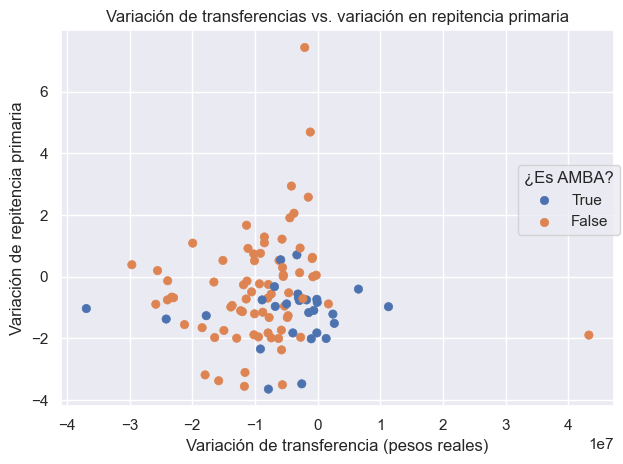

In [22]:
import seaborn.objects as so

p1 = (
    so.Plot(df_final, x="variacion_transferencias", y="variacion_repitencia_primaria", color="es_amba")
    .add(so.Dot())
    .label(
        title="Variación de transferencias vs. variación en repitencia primaria",
        x="Variación de transferencia (pesos reales)",
        y="Variación de repitencia primaria",
        color = "¿Es AMBA?"
    )
)

p1.show()

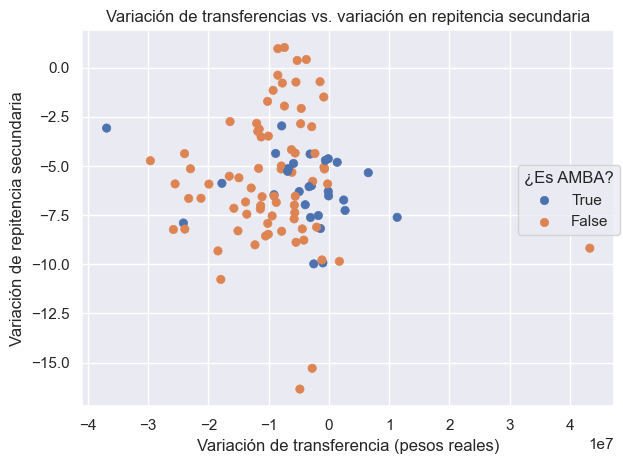

In [25]:
p2 = (
    so.Plot(df_final, x="variacion_transferencias", y="variacion_repitencia_secundaria", color="es_amba")
    .add(so.Dot())
    .label(
        title="Variación de transferencias vs. variación en repitencia secundaria",
        x="Variación de transferencia (pesos reales)",
        y="Variación de repitencia secundaria",
        color = "¿Es AMBA?"
    )
)

p2.show()

No podemos, al menos a partir de esta visualización, ver una relación clara entre la variación de la transferencia y los índices de repitencia. Sin embargo se ve una leve diferencia entre la variación de transferencias entre los municipios pertenecientes al AMBA y los del interior.

En ambos gráficos podemos ver algunos municipios separados de los otros que vamos a analizar individualmente.

Vamos a indentificar: el municipio con mayor aumento en su transferencia, los dos municipios con mayor aumento de repitencia primaria y los dos municipios con mayor aumento de repitencia secundaria.

In [27]:
def resumen_municipio(nombre_municipio, df):
    fila = df[df['nombre_municipio'] == nombre_municipio]
    
    if fila.empty:
        print(f"Municipio '{nombre_municipio}' no encontrado.")
        return

    transferencia = fila['variacion_transferencias'].values[0]
    rep_primaria = fila['variacion_repitencia_primaria'].values[0]
    rep_secundaria = fila['variacion_repitencia_secundaria'].values[0]

    print(f'El municipio "{nombre_municipio}" varió sus transferencias en {transferencia:,.2f} pesos reales, '
          f'y se tradujo en una variación de repitencia primaria de {rep_primaria:.3f} '
          f'y secundaria de {rep_secundaria:.3f}.')

Analizemos el municipio con mayor variación de transferencia.

In [28]:
outlier_transferencia = df_final.sort_values('variacion_transferencias', ascending=False).head(1)
print(outlier_transferencia[['nombre_municipio', 'variacion_transferencias']])

    nombre_municipio  variacion_transferencias
43  General Villegas              4.330007e+07


In [29]:
resumen_municipio('General Villegas', df_final)

El municipio "General Villegas" varió sus transferencias en 43,300,072.25 pesos reales, y se tradujo en una variación de repitencia primaria de -1.890 y secundaria de -9.180.


Podemos concluir que en el municipio General Villegas el aumento de sus transferencias produjo una disminución considerable en sus tasas de repitencia.

In [30]:
outliers_rep_primaria = df_final.sort_values('variacion_repitencia_primaria', ascending=False).head(2)
print(outliers_rep_primaria[['nombre_municipio', 'variacion_repitencia_primaria']])

   nombre_municipio  variacion_repitencia_primaria
69       Pellegrini                           7.43
63    Monte Hermoso                           4.69


In [31]:
resumen_municipio('Pellegrini', df_final)
resumen_municipio('Monte Hermoso', df_final)  

El municipio "Pellegrini" varió sus transferencias en -2,038,333.02 pesos reales, y se tradujo en una variación de repitencia primaria de 7.430 y secundaria de -8.110.
El municipio "Monte Hermoso" varió sus transferencias en -1,155,222.08 pesos reales, y se tradujo en una variación de repitencia primaria de 4.690 y secundaria de -9.780.


Ambos municipios recibieron menos transferencias en 2021 que en 2017, sin embargo no se ve una tendencia clara, ya que aumentó su repitencia primaria pero disminuyó la secundaria.

In [32]:
outliers_rep_secundaria = df_final.sort_values('variacion_repitencia_secundaria').head(2)
print(outliers_rep_secundaria[['nombre_municipio', 'variacion_repitencia_secundaria']])

   nombre_municipio  variacion_repitencia_secundaria
40      General Paz                           -16.35
90         Suipacha                           -15.29


In [33]:
resumen_municipio('General Paz', df_final)
resumen_municipio('Suipacha', df_final)

El municipio "General Paz" varió sus transferencias en -4,817,579.04 pesos reales, y se tradujo en una variación de repitencia primaria de -1.320 y secundaria de -16.350.
El municipio "Suipacha" varió sus transferencias en -2,775,552.51 pesos reales, y se tradujo en una variación de repitencia primaria de 0.930 y secundaria de -15.290.


Ambos municipios recibieron menos transferencias en 2021 que en 2017, pero en este caso la variación en la repitencia primaria es muy baja, a diferencia de la secundaria que pretentó una disminución considerable.

Como último analisis, vemos el promedio en la variación de transferencias.

In [57]:
total2017 = df_agrupado.loc[df_agrupado['anio']==2017].monto.sum()
total2021 = df_agrupado.loc[df_agrupado['anio']==2021].monto.sum()
dif = (total2021 - total2017) * 100 / (total2021)
dif
print(f'Porcentaje de variación en transferencias a consejos escolares entre 2017 y 2021: {dif:.2f}%')

Porcentaje de variación en transferencias a consejos escolares entre 2017 y 2021: -11.33%


**Conclusión:**

No se puede ver una relación clara entre la variación en la transferencia a los consejos escolares de un gobierno a otro y las tasas de repitencia, tanto primaria como secundaria, en los municipios pertenecientes a la provincia de Buenos Aires.

Si bien las transferencias a consejos escolares se redujo en un 11%, las tasas de repitencia no variaron con una clara correlación con esto.

En promedio, las transferencias bajaron en casi 8 millones de pesos.

Un aspecto a considerar podría ser cambios en los criterios de repitencia debido a la cuarentena que puede afectar las mediciones del año 2021.

#### Hipótesis 2

¿Qué impacto tuvo la pandemia del COVID-19 (2020–2021) en los niveles de abandono y repitencia escolar en la educación secundaria?

In [ ]:
# Primero voy a dejar el df con solo los indicadores de abandono y repitencia
df_abandono = df_educacion[['anio', 'abandono_interanual_secundaria', 'repitencia_secundaria']]
df_abandono

In [ ]:
# Calculo el promedio por año de las variables
df_abandono_promedio = df_abandono.groupby('anio')[['abandono_interanual_secundaria', 'repitencia_secundaria']].mean().reset_index()
df_abandono_promedio

In [ ]:
(
    so.Plot(data=df_abandono_promedio, x='anio', y='abandono_interanual_secundaria')
    .add(so.Dot())
    .add(so.Line())
    .label(x='Año', y='Abandono interanual secundaria', title='Abandono en la escuela secundaria por año')
)

In [ ]:
# Lo mismo pero con la otra variable
(
    so.Plot(data=df_abandono_promedio, x='anio', y='repitencia_secundaria')
    .add(so.Dot())
    .add(so.Line())
    .label(x='Año', y='Repitencia en la escuela secundaria', title='Repitencia en la escuela secundaria por año')
)

En ambos graficos se puede ver que en 2020 cae abruptamente la repitencia hasta un valor cercano a 0. Esta caida no puede interpretarse como una mejora del sistema educativo. En cambio, refleja una respuesta institucional ante la emergencia sanitaria, donde se implementaron medidas de promoción automática, se suspendieron mecanismos tradicionales de evaluación y se dificultó el registro efectivo del abandono. También se ve que el abandono venía bajando sostenidamente hasta 2019, y que la repitencia bajaba hasta 2016, donde sube, y luego vuelve a disminuir.

Vamos a realizar una regresion linear para intentar predecir cuales hubieran sidos los valores "reales" del abandono escolar de no haber sido por la pandemia. Vamos a intentar ver si sigue la tendencia de disminuir la repitencia y el abandono como venia sucediendo hasta 2019 y ver si podria haber llegado a tener una mejoria con respecto a los valores obtenidos en 2021 y 2022.

In [ ]:
from sklearn.linear_model import LinearRegression
años_pre_pand = df_abandono_promedio[df_abandono_promedio['anio'] <= 2019]
abandono_real = df_abandono_promedio[df_abandono_promedio['anio'] >= 2020]['abandono_interanual_secundaria']
X_train = años_pre_pand[['anio']]
y_abandono = años_pre_pand['abandono_interanual_secundaria']

modelo_abandono = LinearRegression()
modelo_abandono.fit(X_train, y_abandono)

X_pred = df_abandono_promedio[df_abandono_promedio['anio'] >= 2020][['anio']]

abandono_pred = modelo_abandono.predict(X_pred)

print('Prediccion abandono 2020: ', abandono_pred[0])
print('Prediccion abandono 2021: ', abandono_pred[1])
print('Prediccion abandono 2022: ', abandono_pred[2])
r2 = modelo_abandono.score(X_train, y_abandono)
print('R^2:', r2)
recm = root_mean_squared_error(abandono_real, abandono_pred)
print('RECM: ', recm)

Como se puede notar; en el abandono la tendencia a disminuir continua y si no hubiese sido por la pandemia, la regresion nos esta diciendo que hubiese disminuido mas que lo que disminuyo en los años posteriores al 2020. Mi R^2 tambien es muy bueno por ende el modelo se ajusta muy bien para mis datos. El RECM alto en los años post-pandemia refleja que la pandemia causó un cambio significativo que el modelo lineal simple, basado solo en años previos, no puede predecir bien.